# Consistence Test, Messier Objects

We calculated the age of several messier objects

In [1]:
import numpy as np
from astropy.table import Table, join

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

## some comment

In [3]:
filepath = '../resources/ages_messier.tsv'
data = Table.read(filepath, format='ascii.commented_header', delimiter='\t')
data['sn id'] = data['sn id'].astype(int)    # Convert SN ID from float
data.sort('sn id')

In [4]:
data

sn id,age,lower limit,upper limit
int64,float64,float64,float64
63,6.28074771445,6.02648761175,7.24205406908
82,3.50278263495,3.20737262624,13.1420509823
87,12.7857099925,1.63309803945,13.0409688513
89,10.9795521131,6.88141804742,11.1618698551
91,3.39303393465,1.75807984457,13.0852480651
101,8.10320919234,5.7960144099,9.15916798279
105,11.6143810043,11.1645777714,11.8945831169
108,12.1088345808,4.38311001279,12.4704216601


In [30]:
data[0]['upper limit'] - data[0]['age']
data[0]['age'] - data[0]['lower limit']

3.3791952335237614

In [38]:
spiral = [63, 91, 101]
elliptical = [87, 89, 105]
starburst = [82, 108]

spi_ID = [0, 4, 5]
ell_ID = [2, 3, 6]
sta_ID = [1, 7]

In [16]:
data[spi_ID]
data['age'][spi_ID]

6.29792676867
9.17520964342


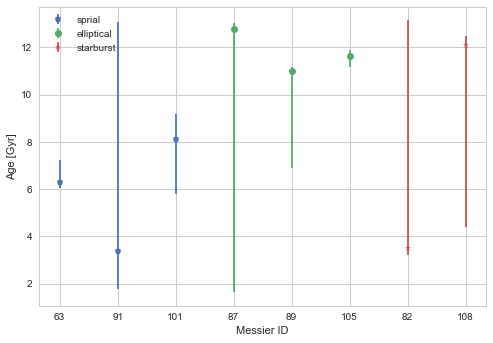

In [47]:
plt.figure('messier')
plt.errorbar([0,1,2], data['age'][spi_ID],
             yerr=[data['age'][spi_ID] - data['lower limit'][spi_ID] , 
                   data['upper limit'][spi_ID] - data['age'][spi_ID]],
             fmt='p', label='sprial')
plt.errorbar([3,4,5], data['age'][ell_ID],
             yerr=[data['age'][ell_ID] - data['lower limit'][ell_ID] , 
                   data['upper limit'][ell_ID] - data['age'][ell_ID]],
             fmt='o', label='elliptical')
plt.errorbar([6,7], data['age'][sta_ID],
             yerr=[data['age'][sta_ID] - data['lower limit'][sta_ID] , 
                   data['upper limit'][sta_ID] - data['age'][sta_ID]],
             fmt='*', label='starburst')

plt.xlabel('Messier ID')
# no ide why I need the extra spacing
plt.axes().set_xticklabels([0]+spiral+elliptical+starburst)
plt.ylabel('Age [Gyr]')

plt.legend(loc=2)
plt.savefig('messierCalibration_temp.pdf')
plt.show()

# Make a violin plot of the distribution
This shows the whole distribution not just the three values trying to show the distribution.

In [5]:
spiral_objects = [63, 91, 101]
elliptical_objects = [87, 89, 105]
starburst_objects = [82, 108]
m_objects = spiral_objects + elliptical_objects + starburst_objects

In [6]:
all_ages = {} #dictionary to hold all the resulting ages.

In [7]:
new = pd.DataFrame(columns=['Age', 'Messier Object'], dtype=np.float64)
#  dtype='Age':np.float64, 'Messier Object':np.str}
new.dtypes

Age               float64
Messier Object    float64
dtype: object

In [8]:
new

,Age,Messier Object


In [9]:
files = '../resources/SN{}_messier_chain.tsv'
num = 1000

# for i in SNData.index.values:
for i in m_objects:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dictionary all_ages.
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        all_ages[str(i)] = ages_.values[index].reshape(num)
        for a in ages_.values[index].reshape(num):
            new.loc[len(new), ['Age', 'Messier Object']] = [a, str(i)]
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')
        
all_ages

{'101': array([  7.59820076,   6.60101267,   9.35290689,   8.50094293,
          9.07375196,   6.25721183,   6.80232149,   7.19143007,
          9.48260479,   6.61264476,  10.43358433,   9.19181827,
          2.76716488,   9.22246792,   7.59192397,   8.75798326,
          7.63930149,   7.9416876 ,  10.16160493,   9.5877644 ,
          7.73996457,   9.62632994,   6.33743885,   8.17516627,
          8.70117669,   8.91730338,   1.96935249,   7.88675318,
          9.54193201,   8.4793889 ,   5.34194976,   7.85461309,
          9.4545326 ,   4.26406495,   9.15129598,  11.50925029,
         10.39511447,   9.5836869 ,   7.99395788,   8.41697862,
          8.29940813,   9.01893025,   6.45356094,   7.39938897,
          8.70117669,  10.53082394,   9.31507594,   8.32421755,
          8.96595265,   3.93172125,   4.74682102,   7.92299123,
          6.66153346,   8.33449419,   7.84270752,   9.40312641,
          9.37290414,   4.80564237,   8.58305349,   8.81611847,
          6.56027828,   7.4475919

In [10]:
sns_palette = sns.color_palette(palette='colorblind', n_colors=3)
# put in order as needed for Messier Calibration plot
my_palette = [sns_palette[0], sns_palette[0], sns_palette[0],
              sns_palette[1], sns_palette[1], sns_palette[1],
              sns_palette[2], sns_palette[2]] 

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnin

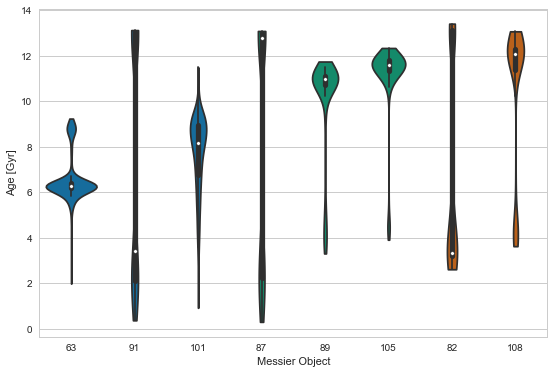

In [15]:
fig = plt.figure('messier age dist')
# sns.violinplot(x='101', data=all_ages)

sns.violinplot(x='Messier Object', y='Age', data=new,
               order=['63', '91', '101', '87', '89', '105', '82', '108'], 
               palette=my_palette,
               scale='area',
#                color='red',
               cut=0)

# sns.lvplot(x='Messier Object', y='Age', data=new,
#            order=['63', '91', '101', '87', '89', '105', '82', '108'],
#            saturation=0.7,
#            palette=my_palette)

# sns.stripplot(x='Messier Object', y='Age', data=new,
#                order=['63', '91', '101', '87', '89', '105', '82', '108'],
#                  color='gray', size=4, alpha=0.2)

plt.ylabel('Age [Gyr]')
# plt.legend(['a line', '2', '3', '4', '2', '3', '4'])
# plt.legend([], ["Attr A", "Attr A+B"])
plt.legend()

fig.set_tight_layout({'pad': 1.5})   #cut edge whitespace
# plt.savefig('messierCalibration_seaborn2.pdf')
plt.show()

In [34]:
all_ages['101']
for i in all_ages['101']:
    print(i)

8.414498778591021
8.967800271072981
6.551216115241052
8.420082044011796
4.891309878357494
6.819832651128539
7.394973723368314
9.077696468250531
8.26257130176146
9.251908094840433
8.311447703393647
6.145863412436234
8.302284710161675
3.2395178062035277
6.630338978075725
9.001973040038342
8.105970057112543
7.984801699383474
7.827908844541467
7.930690402239275
7.828225183100507
6.99290972060367
5.574251731601649
5.099532347412386
3.1794558853902846
0.9365367608545672
6.571238505748148
6.693021953509581
8.8162051170968
6.992016603126328
6.829372331303163
8.946333194366934
7.935908138288559
9.83862387202402
5.01471589006969
8.29197118314189
7.472165768636467
9.082648782114624
7.088707890816101
6.183334660456169
9.030377237326714
8.014564965511736
7.274755847793414
8.95223236142948
5.898896449154907
8.85675196037822
8.89020331119838
8.963520757092857
8.6341108119921
9.540225223791193
9.040723073467955
9.029456385520952
5.51461496804363
5.307463986009937
9.035180322163335
9.671771712018469
7.